# Learning outcome
1. Gentle intro on CV
2. Review on some important motion of image arrays
3. cropping (one of the data augmentation technic emploed in DL model training)
4. Slit n menge image channels
5. Point operator(basic mathematical operation) / gamma correction
    * aims: Enhance or review the contrast or illumination of the images
6. Image blending (add 2 image tgt)

#

In [2]:
import sys
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv
import cv2 as cv2
from util_func import show_img
import matplotlib.pyplot as plt

# Review: important concepts on image array
Image can be broadly categorized as **grayscale** and **color** images

| Grayscale | Color |
| -:- | -:- |
| martrix (2D Array) | 3D Array (channels))
| (h,w) | (h, w, channels)

In [3]:
img = np.zeros((2, 4), dtype=np.uint8)
print(img)

[[0 0 0 0]
 [0 0 0 0]]


In [4]:
img_bgr = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
print(img_bgr)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [5]:
img[0, 1] = 30
img[1, 2] = 100
print(img)

[[  0  30   0   0]
 [  0   0 100   0]]


In [6]:
img_bgr = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
print(img_bgr)

[[[  0   0   0]
  [ 30  30  30]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [100 100 100]
  [  0   0   0]]]


## Accessing pixels element

In [7]:
img = cv.imread("images/lena.jfif")

a = img[50, 70, 0]
b = img.item(50, 70, 0)

a == b

True

In [9]:
%timeit a = img[50, 70, 0]
%timeit b = img.item(50, 70, 0)

64.3 ns ± 0.664 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
55.3 ns ± 0.816 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


The takeaway the execution time is more or less the same, You r free to use other one of this

## Numpy Slicing

In [10]:
# Extract the top left region of the image
yc, xc = img.shape[0] // 2, img.shape[1] // 2

topleft = img[:yc, :xc]

show_img("topleft", topleft)

In [15]:
middle = img[yc-30:yc+30, xc-30:xc+30]

show_img("middle", middle)

# EX1

In [19]:
# create a white image

white = np.zeros((200, 200)) + 255
white = np.uint8(white)

show_img("white", white)

In [20]:
# Q2: design pattern
patch = np.zeros((30, 30), dtype=np.uint8)

patch[:10, 10:20] = 255
patch[10:20, 0:10] = 255
patch[10:20, 20:] = 255
patch[20:, 10:20] = 255

img = np.tile(patch, (3,3))

show_img("img", img)

In [2]:
#q3: extract object of interest

img = cv.imread("images/dog.jfif")

show_img("img", img)

In [ ]:
[i for i in dir]

In [5]:
#1 way:
def select_rect(event, x, y,flags, params):
    """mouse click function"""
    if event == cv.EVENT_LBUTTONDOWN:
        print((x,y))
        cv.circle(img, (x,y), 1, (0, 0, 255), -1)
        cv.imshow("img", img)

img = cv.imread("images/dog.jfif")
cv.imshow("img", img)
cv.setMouseCallback("img", select_rect)
cv.waitKey(0)
cv.destroyAllWindows()

(101, 25)
(186, 149)
(207, 131)
(88, 89)
(43, 105)
(147, 96)
(149, 69)
(86, 69)


In [6]:
#2 way:
bbox = cv.selectROI("dog_region", img)

In [3]:
#3 way:
# top left coordinates: 91, 38 n bottom right coordinates: (170, 120)

img = img[38:120, 91:170]

show_img("img", img)

# Image cropping

In trems of operation, it is identical to slicing.

In [20]:
img = cv.imread("images/dog.jfif")

img_copy = img.copy()

h, w = img.shape[:2]
n_vertical_grids = 3
n_horizontal_grids = 3

# row size n column size
M = int(h / n_vertical_grids)
N = int(w / n_horizontal_grids)

tiles = []

for y in range(0, h, M):
    for x in range(0, w, N):
        x1 = x + N
        y1 = y + M
        
        if x1 > w and y1 > h:
            x1 = w - 1
            y1 = h - 1
            cv.rectangle(img_copy, (x,y), (x1, y1), (0, 255, 0), 1)
            tile = img[y:h, x:w]
            tiles.append(tile)
        elif y1 > h:
            y1 = h - 1
            cv.rectangle(img_copy, (x,y), (x1, y1), (0, 255, 0), 1)
            tile = img[y:h, x:x1]
            tiles.append(tile)
        elif x1 > w:
            x1 = w - 1
            cv.rectangle(img_copy, (x,y), (x1, y1), (0, 255, 0), 1)
            tile = img[y:y1, x:w]
            tiles.append(tile)
        else:
            cv.rectangle(img_copy, (x,y), (x1, y1), (0, 255, 0), 1)
            tile = img[y:y1, x:x1]
            tiles.append(tile)
            
show_img("crop", img_copy)

In [21]:
show_img("top right", tiles[2])


## exercise 1 (image cropping)

In [9]:
img_array = np.zeros_like(img)

yc, xc = img.shape[0] // 2, img.shape[1] //2

img_array[:yc, :xc] = img[yc:, xc:]
img_array[yc:, xc:] = img[:yc, :xc]
img_array[yc:, :xc] = img[:yc, xc:]
img_array[:yc, xc:] = img[yc:, :xc]

show_img("swap", img_array)

## split n merge color channels

In [10]:
b, g, r = cv.split(img)
img_merge = cv.merge((b, g, r))

In [11]:
np.array_equal(img, img_merge)

True

In [1]:
import matplotlib.pyplot as plt

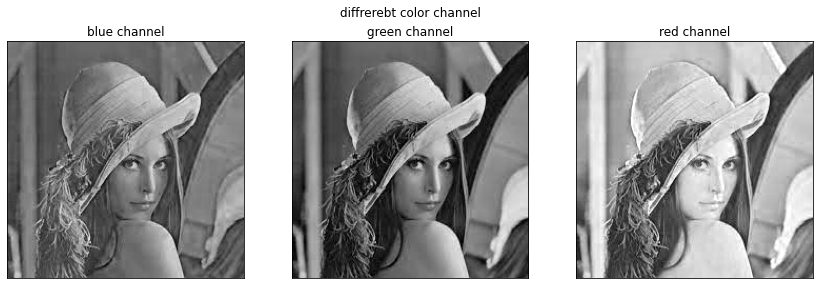

In [17]:
img = cv.imread("images/lena.jfif")

b, g, r = cv.split(img)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
fig.suptitle("diffrerebt color channel")
ax1.imshow(b, cmap=plt.cm.gray)
ax1.set(title="blue channel", xticks=[], yticks=[])
ax2.imshow(g, cmap=plt.cm.gray)
ax2.set(title="green channel", xticks=[], yticks=[])
ax3.imshow(r, cmap=plt.cm.gray)
ax3.set(title="red channel", xticks=[], yticks=[])

plt.tight_layout()
plt.show()

# ex no 2: color channels

In [18]:
img = cv.imread("images/dog.jfif")

channels = cv.split(img)

imgs = []
colors = ("blue", "green", "red")

for i, mat in enumerate(channels):
    arr = np.zeros_like(img)
    arr[:, :, i] = mat
    imgs.append(arr)
    
for c, img in zip(colors, imgs):
    cv.imshow(c, img)
    
cv.waitKey(0)
cv.destroyAllWindows()

## Point operators

$$_(trans)(\textbf{x}) = \alpha f $$

In [22]:
np.array([-2, 0, 99, 260], dtype=np.uint8)

array([254,   0,  99,   4], dtype=uint8)

In [25]:
def point_op(img, alpha, beta):
    """point operators. Argumrnts
    1. source image
    2.multiplier
    3.constant"""
    
    img = img.astype(float)
    res = alpha * img + beta
    res = np.clip(res, 0, 255)
    res = np.uint8(res)
    return res

In [26]:
# increase the brightness n contrast of image

img = cv.imread("images/bridge.jfif")

transform = point_op(img, 2, 30)

cv.imshow("original", img)
show_img("transform", transform)

In [27]:
transform2 = point_op(img, 0.8, -20)

show_img("img", transform2)

## Gamma correction

$$O=(\frac{I}{255})^{\gamma}\times255$$

In [29]:
gamma = 1 / 2.2

lookUpTable = np.empty((1, 256), dtype=np.uint8)
for i in range(256):
    lookUpTable[0, i] = np.clip(pow(i / 255.0, gamma) * 255, 0, 255)
    
img = cv.imread("images/dog.jfif")
res = cv.LUT(img, lookUpTable)

cv.namedWindow("original", cv.WINDOW_NORMAL)
cv.imshow("original", img)
show_img("gamma correction", res, adjust= True)

## Image blending (add 2 images)

$$(\textbf{x}) = \alpha f(\textbf{x}) + (1-\alpha)g($$

$$ g(x) = (1 - \alpha)f_{0}(x) + (\alpha)f_{1}(x) $$

In [30]:
img = cv.imread("images/lena.jfif")
img2 = cv.imread("images/coins.jfif")

alpha = 0.5
h, w = img.shape[:2]
img2= cv.resize(img2, (w,h))

res = cv.addWeighted(img, alpha, img2, 1-alpha, 0)

cv.imshow("img1", img)
cv.imshow("img2", img2)
show_img("blending", res)

## ex1
Create a random noise color and grayscale image. You can set your own width and height, but keep the total number of pixels of both images identical.

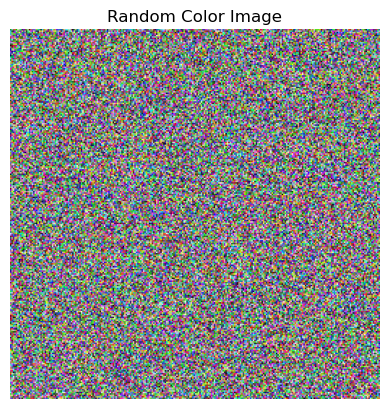

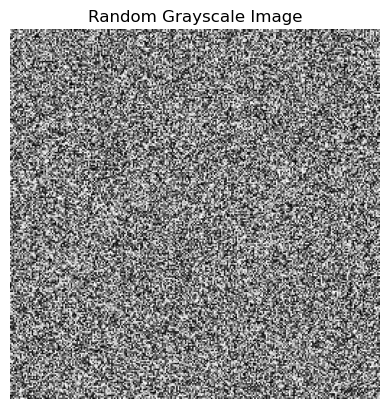

In [3]:
# Set the dimensions of the images
width = 256
height = 256

# Create a random noise color image
color_image = np.random.randint(0, 256, (height, width, 3), dtype=np.uint8)

# Create a random noise grayscale image
grayscale_image = np.random.randint(0, 256, (height, width), dtype=np.uint8)

# Display the color image
plt.figure()
plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Random Color Image')
plt.show()

# Display the grayscale image
plt.figure()
plt.imshow(grayscale_image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Random Grayscale Image')
plt.show()

## ex2
Convert the code chunk found under section Divide an image into smaller patches using cropping into a function with the following signature:
crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)

-img is the source image

-num_horizontal_grid and num_vertical_grid are the number of patches along x and y axes.

-line_color is the color of the grid line.

-The output of the function should be image with grids

In [6]:
def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color):
    # Get the dimensions of the source image
    height, width = img.shape[:2]

    # Calculate the size of each grid patch
    patch_width = width // num_horizontal_grid
    patch_height = height // num_vertical_grid

    # Draw the vertical grid lines
    for i in range(1, num_horizontal_grid):
        x = i * patch_width
        cv2.line(img, (x, 0), (x, height), line_color, 1)

    # Draw the horizontal grid lines
    for j in range(1, num_vertical_grid):
        y = j * patch_height
        cv2.line(img, (0, y), (width, y), line_color, 1)

    return img

# Example usage
img = cv2.imread("images/dog.jfif")

num_horizontal = 4
num_vertical = 4
line_color = (0, 255, 0)  # Green color for grid lines

result_image = crop_grid(source_image, num_horizontal, num_vertical, line_color)
show_img("img", img)


## ex3

Display image sequences of smooth transition of two images with different values of $\alpha$. Refer to code in section "Image blending". Use "lena.jfif" and "coins.jfif" as the base images.


In [11]:
# Load the base images
img1 = cv2.imread("images/lena.jfif")
img2 = cv2.imread("images/coins.jfif")

# Convert the images to the same size
img1 = cv2.resize(img1, (img2.shape[1], img2.shape[0]))

# Define the alpha values for the transition sequence
alpha_values = np.linspace(0, 1, num=10)

# Display the image sequence with smooth transitions
for alpha in alpha_values:
    blended = cv2.addWeighted(img1, 1-alpha, img2, alpha, 0)
    cv2.imshow("Blended Image", blended)
    cv2.waitKey(200)  # Delay between each frame (200ms)
    
cv2.destroyAllWindows()

## ex4
Suppose you are a digital content creator and wish to share photo online. However, you wish to protect these images from being stolen or altered by others. Leverage your image processing knowledge to apply watermark on image "travel_hd.jpg". The example of resulting watermarked image are as shown in the following:

In [28]:
# Load the original image and the watermark image
original_image = cv2.imread("images/travel_hd.jpg")
watermark_image = cv2.imread("images/watermark.png", cv2.IMREAD_UNCHANGED)

# Resize the watermark image to an appropriate size
resized_watermark = cv2.resize(watermark_image, (1000, 500))  # Adjust the size as needed

# Choose a position to place the watermark
x_offset = 10  # x-coordinate offset
y_offset = original_image.shape[0] - watermark_image.shape[0] - 10  # y-coordinate offset

# Get the dimensions of the watermark image
w, h = resized_watermark.shape[:2]

# Overlay the watermark on the original image using alpha blending
watermarked_image = original_image.copy()
watermarked_image[y_offset:y_offset + w, x_offset:x_offset + h] = resized_watermark

# Save the resulting watermarked image
cv2.imwrite("watermarked_image.jpg", watermarked_image)

True